# **3.2 - Átomos e Moléculas** ⚛️☕
**Objetivo**: Utilize classes de Python para modelar elementos químicos e moléculas.
***

### **Introdução** 💡

<p style="text-align: justify;">
Segundo a referência [1], uma mólecula pode ser definida como "um grupo de dois ou mais átomos que formam a menor unidade identificável na qual uma substância pura pode ser dividida e ainda reter a composição e as propriedades químicas dessa substância". Ou seja, temos que para a formação de uma mólecula, precisamos da junção de uma determinada quantidade de átomos (de elementos iguais ou distintos), as quais contribuem para a determinação de suas propriedades. 

Computacionalmente, considerando que cada átomo pode ser considerado como um "objeto" integrante de um grupo maior (elementos químicos) - no qual todos possuem propriedades em comum (como símbolo, número atômico e peso atômico) - é possível considerar que esses podem ser representados por uma classe (Elemento), que pode auxiliar na construção de outra classe (Molécula) para a representação dos compostos que podem ser formados (e suas respectivas características, como peso atômico). 

Nesse sentido, esse trabalho visa a criação de duas classes (Elemento e Molécula) para a representação de moléculas. Como exemplo, a molécula de cafeína (C₈H₁₀N₄O₂, também denominada quimicamente de 1,3,7-trimetilxantina) será representada [2] e as respectivas propriedades atômicas serão retiradas da plataforma Ptable. [3]


</p>


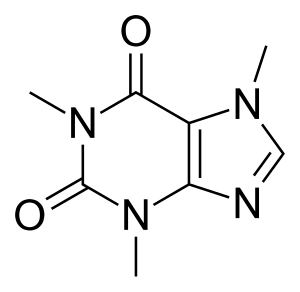

[Fórmula estrutural da molécula de cafeína][2]

### **Classe Elemento** ⚛️

Em primeiro lugar, é necessário criar a classe Elemento, a qual inicializa um elemento como objeto a partir do fornecimento de argumentos obrigatórios relacionados a propriedades atômicas, como símbolo do elementos, número atômico e peso atômico. Dependendo da aplicação desejada, outras propriedades, como ponto de fusão, ponto de ebulição e raio estimado, poderão ser adicionadas como argumentos não obrigatórios.

In [1]:
class Elemento:
    def __init__(self, simbolo, num_atomico, peso_atomico, ponto_fusao=None, ponto_ebulicao=None, raio_estimado=None):
        """Inicialização de um objeto elemento
        
        Args:
        simbolo: abreviatura de uma ou duas letras que representa o elemento químico 
        num_atomico: número de prótons presentes no núcleo do elemento
        peso_atomico: massa do átomo
        ponto_fusao = temperatura (K) na qual o elemento passa do estado sólido para o estado líquido
        ponto_ebulicao = temperatura (K) na qual o elemento passa do estado líquido para o estado gasoso
        raio_estimado = distância entre o núcleo do átomo e sua camada mais externa
        
        """
        self.simbolo = simbolo
        self.num_atomico = num_atomico
        self.peso_atomico = peso_atomico
        self.ponto_fusao = ponto_fusao
        self.ponto_ebulicao = ponto_ebulicao
        self.raio_estimado = raio_estimado

Considerando as aplicações que serão implementadas pela classe Molécula, as características opcionais não serão necessárias. Logo, para a inicialização dos objetos referentes aos elementos integrantes da cafeína (carbono, hidrogênio, nitrogênio e oxigênio), apenas o símbolo, número atômico e peso atômico serão utilizados.

In [2]:
C = Elemento("C", 6, 12.011)
H = Elemento("H", 1, 1.008)
N = Elemento("N", 7, 14.007)
O = Elemento("O", 8, 15.999)

### **Classe Molécula** ☕

<p style="text-align: justify;">
Após a criação da classe Elemento, a classe Molecula pode ser criada. Para a inicialização do objeto, é preciso utilizar um dicionário, o qual contém como chave um objeto da classe Elemento e como valor a quantidade de átomos desse elemento presentes na molécula. Como outros métodos, a classe possui a função "__repr__", que representa a fórmula química por meio do Sistema de Hill (o qual é um método de representação de fórmulas químicas no qual em primeiro lugar, é representado o carbono, em segundo, o hidrogênio e, após esses dois, os demais elementos em ordem alfabética [4]), e a função "peso_atomico", que calcula o peso atômico da molécula por meio do peso atômico de cada elemento (multiplicado pela quantidade de átomos desse elemento).
</p>

In [3]:

class Molecula:
    def __init__(self, dicionario):
        """Inicializa a molécula
        
        Args:
        dicionario: dicionário que contém como chave um objeto da classe Elemento e como valor a quantidade de átomos desse elemento presentes na molécula.
        """
        self.elementos = list(dicionario.keys())
        self.quantidade = list(dicionario.values())
        self.dicionario = dicionario  

    def __repr__(self):
        """Representa a fórmula química da molécula pelo Sistema de Hill""" 
        
        simb_elementos = [obj.simbolo for obj in self.elementos]
        formula_quimica = ""
        
        if "C" in simb_elementos:
            elemento_C = [obj for obj in self.elementos if obj.simbolo == "C"][0]
            formula_quimica += "C" + str(self.dicionario[elemento_C])
            simb_elementos.remove("C")
            
        if "H" in simb_elementos:
            elemento_H = [obj for obj in self.elementos if obj.simbolo == "H"][0]
            formula_quimica += "H" + str(self.dicionario[elemento_H])
            simb_elementos.remove("H")
        
        for simbolo in sorted(simb_elementos):
            elemento = [obj for obj in self.elementos if obj.simbolo == simbolo][0]
            formula_quimica += elemento.simbolo + str(self.dicionario[elemento])
                     
        return f"A fórmula química da molécula criada é {formula_quimica}"
    
    def peso_atomico(self):
        """Calcula o peso atômico da molécula"""
        peso_molecular = sum(elemento.peso_atomico * quantidade for elemento, quantidade in zip(self.elementos, self.quantidade))
        return peso_molecular


Para a testagem da classe, o dicionário com as quantidades de cada elemento, juntamente com os objetos criados anteriormente, serão utilizados.

In [4]:
cafeina = {
    C: 8,
    H: 10,
    N: 4, 
    O: 2
}

In [5]:
molecula_cafeina = Molecula(cafeina)

Agora, os métodos podem ser utilizados.

In [6]:
molecula_cafeina

A fórmula química da molécula criada é C8H10N4O2

O método dunder "__ repr__" foi eficiente para a representação da molécula, visto que a fórmula química fornecida é condizente com a representação usual dessa.

In [7]:
molecula_cafeina.peso_atomico()

194.194

Além disso, segundo a referência [2], o peso atômico da cafeína 194.19 g/mol, o que condiz com o resultado fornecido pelo método.

### **Extra: Biblioteca Mendeleev** 🧑🏻‍🔬

Vale mencionar que a ideia de representar elementos por meio de classes é algo já consolidado, sendo que existem bibliotecas voltadas a esse fim. Um dos exemplos mais conhecidos é a biblioteca Mendeleev. [5]

In [8]:
from mendeleev import C, H, O, N

Os elementos também poder ser inicializados pelo método element, o qual pode receber como entrada o símbolo do elemento, o número atômico ou o nome do elemento (em inglês):
```python
from mendeleev import element
C, H, O= element(["C", 1, "Oxygen"])
````

Com esse módulo, é possível importar cada elemento da tabela periódica e verificar suas principais características. Podemos utilizar o carbono para isso:

In [9]:
C

Element(
	abundance_crust=200.0,
 	abundance_sea=28.0,
 	annotation='density(graphite), ',
 	atomic_number=6,
 	atomic_radius=70.0,
 	atomic_radius_rahm=190.0,
 	atomic_volume=5.3,
 	atomic_weight=12.011,
 	atomic_weight_uncertainty=None,
 	block='p',
 	c6=46.6,
 	c6_gb=47.9,
 	cas='7440-44-0',
 	covalent_radius_bragg=77.0,
 	covalent_radius_cordero=73.0,
 	covalent_radius_pyykko=75.0,
 	covalent_radius_pyykko_double=67.0,
 	covalent_radius_pyykko_triple=60.0,
 	cpk_color='#c8c8c8',
 	density=2.2,
 	description='Carbon is a member of group 14 of the periodic table. It has three allotropic forms of it, diamonds, graphite and fullerite. Carbon-14 is commonly used in radioactive dating. Carbon occurs in all organic life and is the basis of organic chemistry. Carbon has the interesting chemical property of being able to bond with itself, and a wide variety of other elements.',
 	dipole_polarizability=11.3,
 	dipole_polarizability_unc=0.2,
 	discoverers='Known to the ancients',
 	discovery_

Além disso, cada propriedade pode ser acessada individualmente.

In [10]:
C.atomic_number

6

Além disso, a biblioteca ainda possue diversos *datasets* relacionados a propriedades atômicas, como a própria tabela periódica, os quais estão melhor descritos na referência 5.

In [11]:
from mendeleev.fetch import fetch_table
df = fetch_table('elements')
display(df)

,annotation,atomic_number,atomic_radius,atomic_volume,block,density,description,dipole_polarizability,electron_affinity,electronic_configuration,...,discovery_year,discovery_location,name_origin,sources,uses,mendeleev_number,dipole_polarizability_unc,pettifor_number,glawe_number,molar_heat_capacity
0,"density(@ -253C), evaporation_heat(H-H), fusio...",1,25.0,14.1,s,0.000082,"Colourless, odourless gaseous chemical element...",4.50711,0.754195,1s,...,1766.0,England,Greek: hydro (water) and genes (generate),Commercial quantities are produced by reacting...,Most hydrogen is used in the production of amm...,105,0.00003,103.0,103.0,28.836
1,"density(@ -270C),",2,120.0,31.8,s,0.000164,"Colourless, odourless gaseous nonmetallic elem...",1.38375,-19.700000,1s2,...,1895.0,Scotland/Sweden,Greek: hêlios (sun).,Found in natural gas deposits & in the air (5 ...,"Used in balloons, deep sea diving & welding. A...",112,0.00002,1.0,1.0,20.786
2,,3,145.0,13.1,s,0.534000,Socket silvery metal. First member of group 1 ...,164.11250,0.618049,[He] 2s,...,1817.0,Sweden,Greek: lithos (stone).,Obtained by passing electric charge through me...,Used in batteries. Also for certain kinds of g...,1,0.00050,12.0,12.0,24.860
3,,4,105.0,5.0,s,1.850000,Grey metallic element of group 2 of the period...,37.74000,-2.400000,[He] 2s2,...,1798.0,Germany/France,"Greek: beryllos, ""beryl"" (a mineral).",Found mostly in minerals like beryl [AlBe3(Si6...,Its ability to absorb large amounts of heat ma...,75,0.03000,77.0,77.0,16.443
4,,5,85.0,4.6,p,2.340000,An element of group 13 of the periodic table. ...,20.50000,0.279723,[He] 2s2 2p,...,1808.0,England/France,From Arabic and Persian words for borax.,"Obtained from kernite, a kind of borax (Na2B4O...",Used with titanium & tungsten to make heat res...,81,0.10000,86.0,86.0,11.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,,114,NaN,NaN,p,9.928000,None,31.00000,NaN,[Rn] 5f14 6d10 7s2 7p2,...,1998.0,Russia,Named after the Flerov Laboratory of Nuclear R...,Made by bombarding plutonium-244 with calcium-48.,None,92,4.00000,NaN,NaN,NaN
114,,115,NaN,NaN,p,13.500000,None,71.00000,NaN,[Rn] 5f14 6d10 7s2 7p3,...,2003.0,Russia,Named after the city of Moscov.,Made by bombarding americium-243 with calcium-48.,None,98,20.00000,NaN,NaN,NaN
115,,116,NaN,NaN,p,12.900000,None,NaN,NaN,[Rn] 5f14 6d10 7s2 7p4,...,2000.0,United States,Named after the Lawrence Livermore National La...,Made by bombardng curium-248 with calcium-48.,None,104,NaN,NaN,NaN,NaN
116,,117,NaN,NaN,p,7.200000,None,76.00000,NaN,[Rn] 5f14 6d10 7s2 7p5,...,2010.0,Russia/United States,Named after the state of Tennessee in United S...,Made by bombarding berkelium-249 with calcium-48.,None,111,15.00000,NaN,NaN,NaN


### **Conclusão** 🧪

<p style="text-align: justify;">
Foi possível concluir que as classes podem ser formas efetivas para a representação de elementos e moléculas. A lógica aplicada é simples e intuitiva, sendo que outros métodos relacionados com propriedades atômicas também poderiam ter sido implementados (como a determinação da quantidade de neutrôns, através da utilização do número de prótons e peso atômico, por exemplo), o que demonstra a grande versalitidade desse tipo de representação. Além disso, foi possível verificar que já existem bibliotecas (como a Mendeleev) que utilizam classes para a representação de elementos.
</p>

### **Referências!** 🗃️

[1] Molecule | Definition, Examples, Structures, & Facts | Britannica. Disponível em: <https://www.britannica.com/science/molecule>. Acesso em: 16 mar. 2025.

[2] Cafeína. In: Wikipédia, a enciclopédia livre. [s.l.: s.n.], 2025. Disponível em: <https://pt.wikipedia.org/w/index.php?title=Cafe%C3%ADna&oldid=69592888>. Acesso em: 16 mar. 2025.

[3] Tabela Periódica - Ptable. Disponível em: <https://ptable.com/?lang=pt>. Acesso em: 16 mar. 2025.

[4] Sistema de Hill. In: Wikipédia, a enciclopédia livre. [s.l.: s.n.], 2017. Disponível em: <https://pt.wikipedia.org/w/index.php?title=Sistema_de_Hill&oldid=49055303>. Acesso em: 16 mar. 2025.

[5] Welcome to mendeleev’s documentation — mendeleev 0.20.1 documentation. Disponível em: <https://mendeleev.readthedocs.io/en/stable/>. Acesso em: 16 mar. 2025.